### Import Libraries

In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import mean_squared_error, root_mean_squared_error, make_scorer
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import LabelEncoder
from scipy.stats import skew


from sklearn.linear_model import LinearRegression, Lasso, Ridge
from xgboost import XGBRegressor

### Exploratory Data Analysis

In [58]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

In [59]:
train_df.shape

(1460, 81)

In [60]:
train_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [61]:
train_df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [62]:
# Drop the id column
train_df = train_df.drop('Id', axis=1)


In [63]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [64]:
train_df.dtypes[train_df.dtypes != 'object']

MSSubClass         int64
LotFrontage      float64
LotArea            int64
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
MasVnrArea       float64
BsmtFinSF1         int64
BsmtFinSF2         int64
BsmtUnfSF          int64
TotalBsmtSF        int64
1stFlrSF           int64
2ndFlrSF           int64
LowQualFinSF       int64
GrLivArea          int64
BsmtFullBath       int64
BsmtHalfBath       int64
FullBath           int64
HalfBath           int64
BedroomAbvGr       int64
KitchenAbvGr       int64
TotRmsAbvGrd       int64
Fireplaces         int64
GarageYrBlt      float64
GarageCars         int64
GarageArea         int64
WoodDeckSF         int64
OpenPorchSF        int64
EnclosedPorch      int64
3SsnPorch          int64
ScreenPorch        int64
PoolArea           int64
MiscVal            int64
MoSold             int64
YrSold             int64
SalePrice          int64
dtype: object

In [65]:
train_df.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


### Numerical features

In [66]:
numeric_features = train_df.dtypes[train_df.dtypes != 'object'].index


array([[<Axes: title={'center': 'MSSubClass'}>,
        <Axes: title={'center': 'LotFrontage'}>,
        <Axes: title={'center': 'LotArea'}>,
        <Axes: title={'center': 'OverallQual'}>,
        <Axes: title={'center': 'OverallCond'}>,
        <Axes: title={'center': 'YearBuilt'}>],
       [<Axes: title={'center': 'YearRemodAdd'}>,
        <Axes: title={'center': 'MasVnrArea'}>,
        <Axes: title={'center': 'BsmtFinSF1'}>,
        <Axes: title={'center': 'BsmtFinSF2'}>,
        <Axes: title={'center': 'BsmtUnfSF'}>,
        <Axes: title={'center': 'TotalBsmtSF'}>],
       [<Axes: title={'center': '1stFlrSF'}>,
        <Axes: title={'center': '2ndFlrSF'}>,
        <Axes: title={'center': 'LowQualFinSF'}>,
        <Axes: title={'center': 'GrLivArea'}>,
        <Axes: title={'center': 'BsmtFullBath'}>,
        <Axes: title={'center': 'BsmtHalfBath'}>],
       [<Axes: title={'center': 'FullBath'}>,
        <Axes: title={'center': 'HalfBath'}>,
        <Axes: title={'center': 'Bedroo

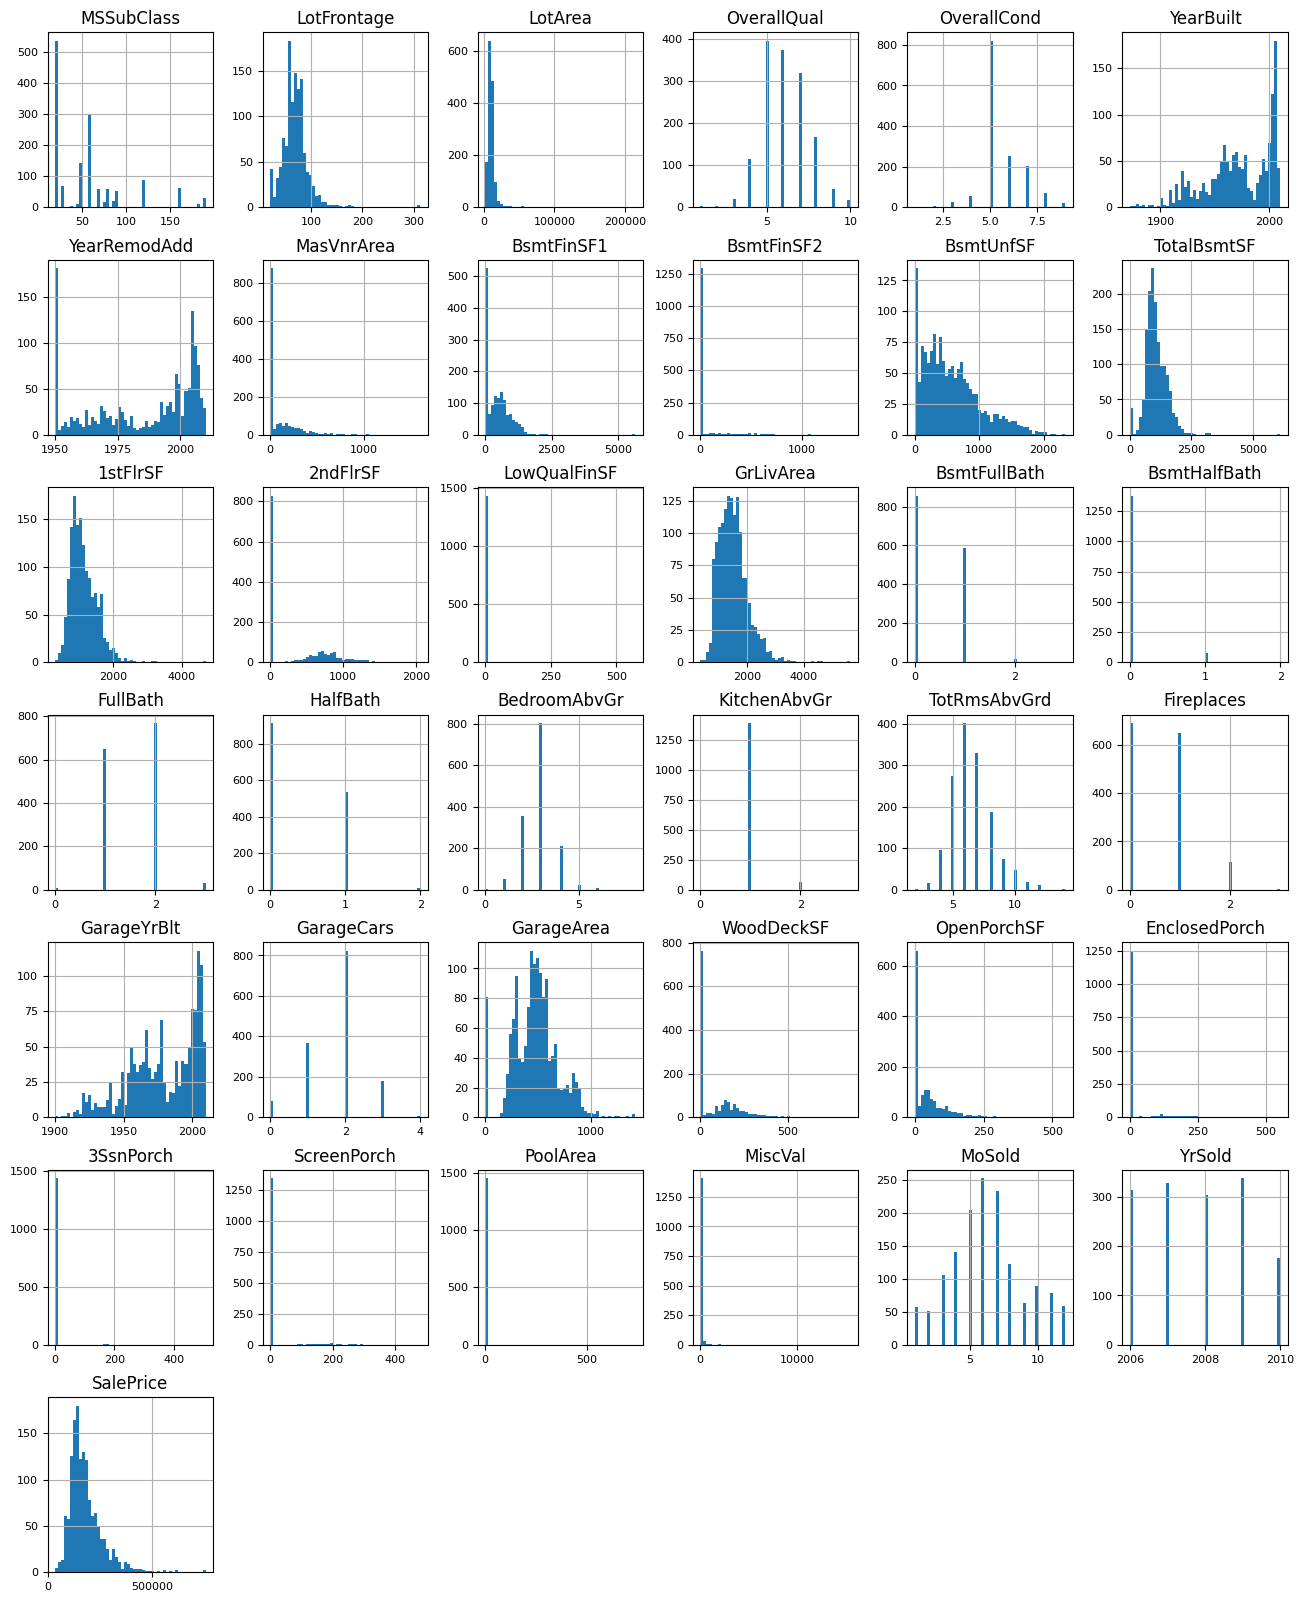

In [67]:
train_df[numeric_features].hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8)

**Correlation matrix**

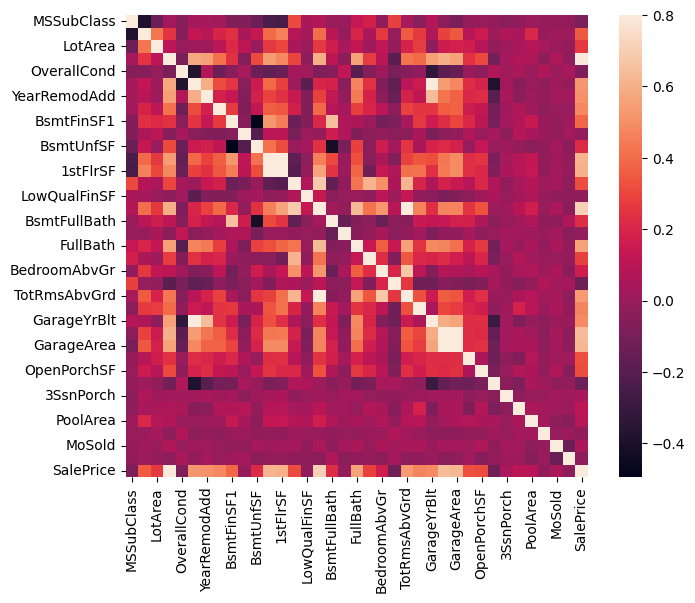

In [68]:
num_feature_df = train_df[numeric_features]
corrmat = num_feature_df.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corrmat, vmax=.8, square=True)
plt.show()


**Analyzing the most important features**

 SalePrice correlation matrix (only **top 10** correlated varialbles)

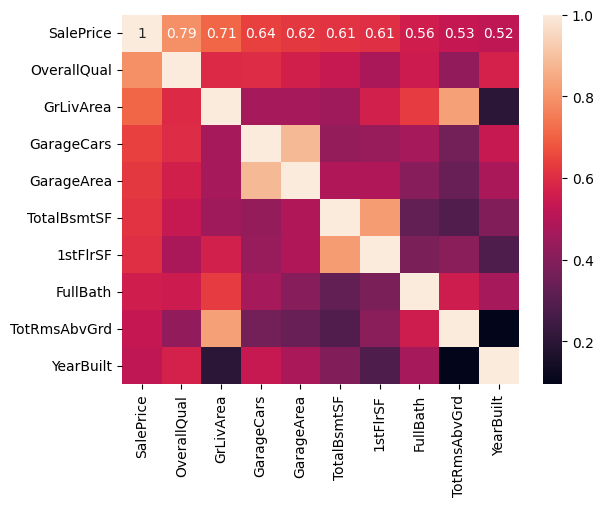

In [69]:
k = 10
top_cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index

# .values.T extracts the values and transposes the matrix 
# so that each row represents a variable (necessary for np.corrcoef).
cm = np.corrcoef(train_df[top_cols].values.T)
hm = sns.heatmap(cm, annot=True, yticklabels=top_cols.values, xticklabels=top_cols.values)
plt.show()

Scatter plots of some numerical feature against the SalePrice

In [70]:
num_feature_df = num_feature_df.drop('SalePrice', axis=1)


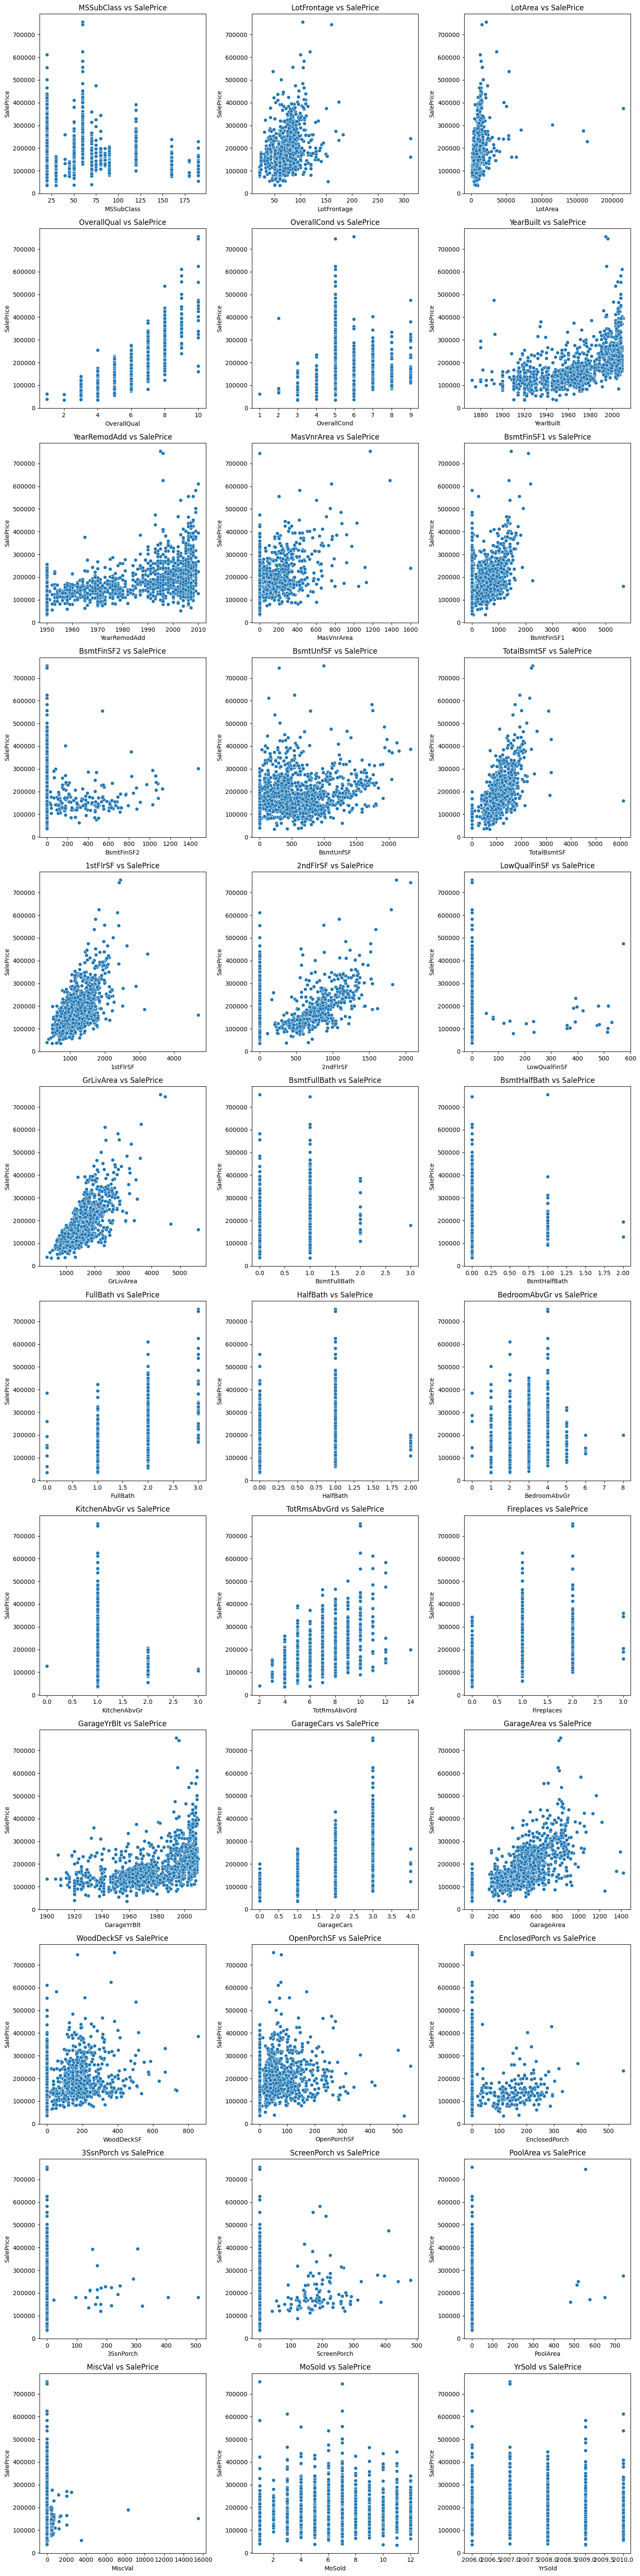

In [71]:
num_features = num_feature_df.columns

num_features_count = len(num_features)
# Define the number of columns for the grid
n_cols = 3
n_rows = (num_features_count + n_cols - 1) // n_cols  # Calculate the number of rows

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, n_rows * 5))  # Adjust figsize as needed
axes = axes.flatten()  # Flatten the array of axes for easy iteration

for i, feature in enumerate(num_features):
    sns.scatterplot(data=train_df, x=feature, y='SalePrice', ax=axes[i])
    axes[i].set_title(f'{feature} vs SalePrice')
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('SalePrice')

# Remove any unused subplots
for j in range(len(num_features), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


We notice that that some features have outliers.

In [72]:
# removing outliers
outliers_features = ['LotFrontage', 'LotArea', 'TotalBsmtSF', 'GrLivArea']


Let's explore in depth these features

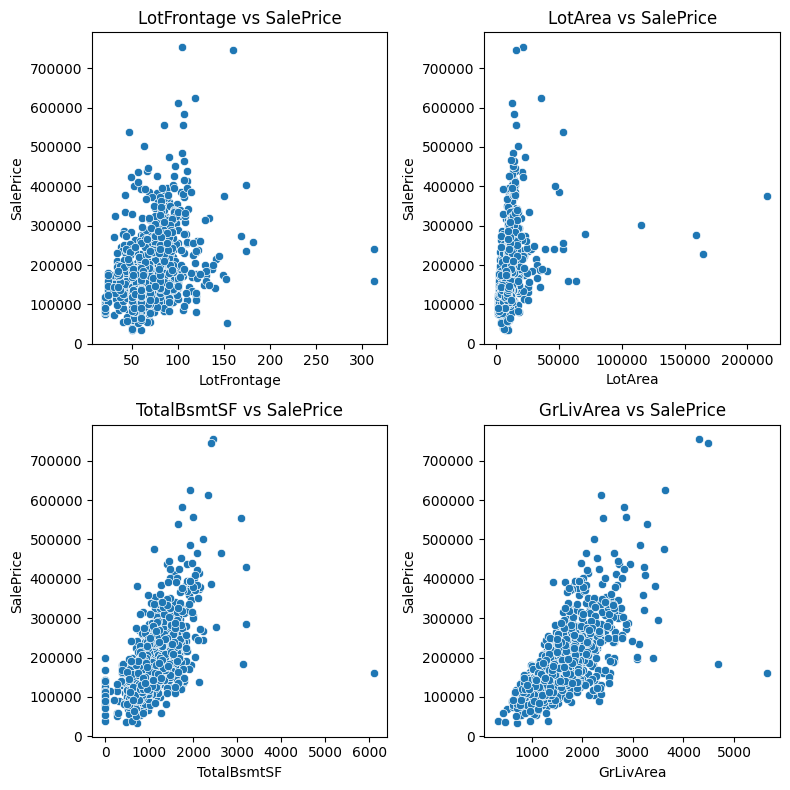

In [73]:

fig, axes = plt.subplots(2, 2, figsize=(8, 8))  

axes = axes.flatten()  # Flatten the array of axes for easy iteration

for i, feature in enumerate(outliers_features):
    sns.scatterplot(data=train_df, x=feature, y='SalePrice', ax=axes[i])
    axes[i].set_title(f'{feature} vs SalePrice')
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('SalePrice')


plt.tight_layout()
plt.show()


Buying a big house for a small price is generally uncommon. However we can see some points on the bottom right of each plots.these values are outliers. Therefore we can delete them.

Now we will remove the outliers.

In [74]:
train_df = train_df.drop(train_df[(train_df['LotFrontage']>250)&(train_df['SalePrice']<600000)].index)
train_df = train_df.drop(train_df[(train_df['LotArea']>100000)&(train_df['SalePrice']<600000)].index)
train_df = train_df.drop(train_df[(train_df['TotalBsmtSF']>4000)&(train_df['SalePrice']<200000)].index)
train_df = train_df.drop(train_df[(train_df['GrLivArea']>4000)&(train_df['SalePrice']<300000)].index)


Check the scatter plot again.

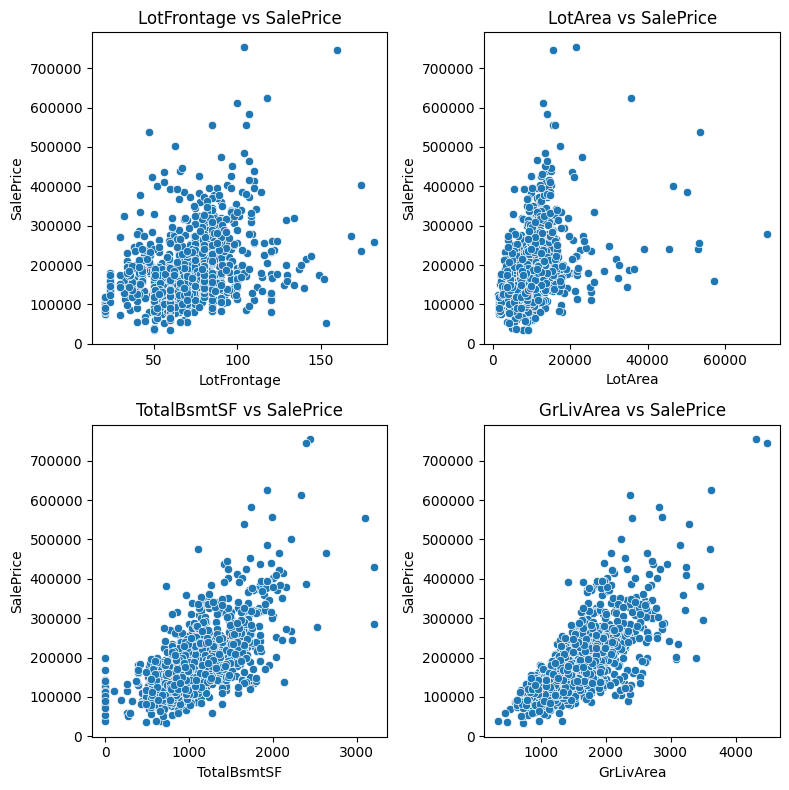

In [75]:

fig, axes = plt.subplots(2, 2, figsize=(8, 8))  

axes = axes.flatten()  # Flatten the array of axes for easy iteration

for i, feature in enumerate(outliers_features):
    sns.scatterplot(data=train_df, x=feature, y='SalePrice', ax=axes[i])
    axes[i].set_title(f'{feature} vs SalePrice')
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('SalePrice')


plt.tight_layout()
plt.show()


### SalePrice

In [76]:
train_df['SalePrice'].describe()

count      1453.000000
mean     180574.842395
std       79338.212690
min       34900.000000
25%      129900.000000
50%      162900.000000
75%      213500.000000
max      755000.000000
Name: SalePrice, dtype: float64

/tmp/ipykernel_40644/2295680848.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_df['SalePrice'],   hist_kws={'alpha': 0.4});


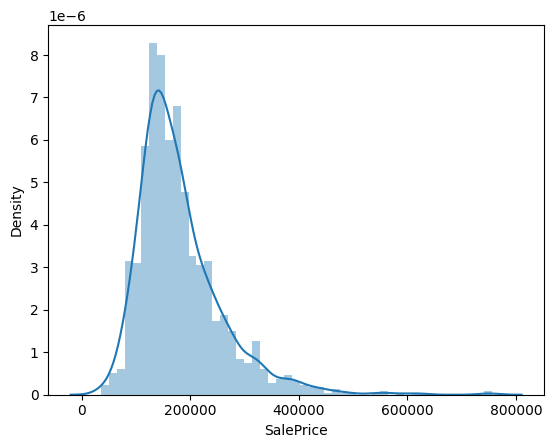

In [77]:
sns.distplot(train_df['SalePrice'],   hist_kws={'alpha': 0.4});

**Transforming the SalePrice**

In [78]:
train_df['SalePrice'] = np.log1p(train_df['SalePrice'])

/tmp/ipykernel_40644/2295680848.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_df['SalePrice'],   hist_kws={'alpha': 0.4});


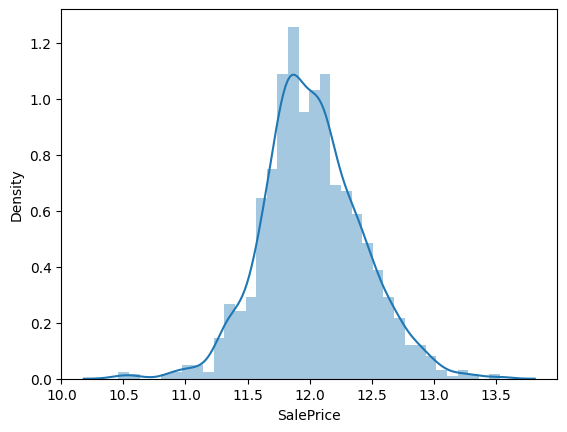

In [79]:
sns.distplot(train_df['SalePrice'],   hist_kws={'alpha': 0.4});

### Data Cleaning

In [80]:
null_data_train = (train_df.isnull().sum() / len(train_df)) * 100
null_data_train_df = pd.DataFrame({'Missing Ratio': null_data_train})
null_data_train_df = null_data_train_df[null_data_train_df['Missing Ratio'] > 0]
null_data_train_df = null_data_train_df.sort_values(by='Missing Ratio', ascending=False)
null_data_train_df

,Missing Ratio
PoolQC,99.587061
MiscFeature,96.421198
Alley,93.737096
Fence,80.660702
MasVnrType,59.807295
FireplaceQu,47.487956
LotFrontage,17.618720
GarageType,5.574673
GarageYrBlt,5.574673
GarageFinish,5.574673


In [81]:
null_data_test = (test_df.isnull().sum() / len(test_df)) * 100
null_data_test_df = pd.DataFrame({'Missing Ratio': null_data_test})
null_data_test_df = null_data_test_df[null_data_test_df['Missing Ratio'] > 0]
null_data_test_df = null_data_test_df.sort_values(by='Missing Ratio', ascending=False)
null_data_test_df



,Missing Ratio
PoolQC,99.794380
MiscFeature,96.504455
Alley,92.666210
Fence,80.123372
MasVnrType,61.274846
FireplaceQu,50.034270
LotFrontage,15.558602
GarageCond,5.346127
GarageYrBlt,5.346127
GarageQual,5.346127


In [82]:

num_col = ['LotFrontage', 'GarageYrBlt', 'MasVnrArea', 'Electrical']
replace_none_col = [col for col in null_data_train_df.index if col not in num_col]


In [83]:
for col in replace_none_col:
    train_df[col] = train_df[col].fillna('None')
    test_df[col] = test_df[col].fillna('None')

In [84]:
# replace missing values of LotFrontage with the median in the neighborhood

# Calculate the median LotFrontage for each neighborhood
median_lot_frontage = train_df.groupby('Neighborhood')['LotFrontage'].median()

# Fill missing values in the training set
train_df['LotFrontage'] = train_df.apply(
    lambda row : median_lot_frontage[row["Neighborhood"]] if pd.isnull(row['LotFrontage']) else row['LotFrontage'], axis=1
)

# Fill the missing values in testing set
test_df["LotFrontage"] = test_df.apply(
    lambda row: median_lot_frontage[row["Neighborhood"]] if pd.isnull(row["LotFrontage"]) else row["LotFrontage"], axis=1
)

In [85]:
train_df['GarageYrBlt'] = train_df['GarageYrBlt'].fillna(0)
test_df['GarageYrBlt'] = test_df['GarageYrBlt'].fillna(0)

In [86]:
train_df['MasVnrArea'] = train_df['MasVnrArea'].fillna(0)
test_df['MasVnrArea'] = test_df['MasVnrArea'].fillna(0)

In [87]:
mode_electrical = train_df['Electrical'].mode()
train_df['Electrical'] = train_df['Electrical'].fillna(mode_electrical[0])
test_df['Electrical'] = test_df['Electrical'].fillna(mode_electrical[0])

In [88]:
rows_with_nulls = train_df[train_df.isnull().any(axis=1)]
print(rows_with_nulls)


Empty DataFrame
Columns: [MSSubClass, MSZoning, LotFrontage, LotArea, Street, Alley, LotShape, LandContour, Utilities, LotConfig, LandSlope, Neighborhood, Condition1, Condition2, BldgType, HouseStyle, OverallQual, OverallCond, YearBuilt, YearRemodAdd, RoofStyle, RoofMatl, Exterior1st, Exterior2nd, MasVnrType, MasVnrArea, ExterQual, ExterCond, Foundation, BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinSF1, BsmtFinType2, BsmtFinSF2, BsmtUnfSF, TotalBsmtSF, Heating, HeatingQC, CentralAir, Electrical, 1stFlrSF, 2ndFlrSF, LowQualFinSF, GrLivArea, BsmtFullBath, BsmtHalfBath, FullBath, HalfBath, BedroomAbvGr, KitchenAbvGr, KitchenQual, TotRmsAbvGrd, Functional, Fireplaces, FireplaceQu, GarageType, GarageYrBlt, GarageFinish, GarageCars, GarageArea, GarageQual, GarageCond, PavedDrive, WoodDeckSF, OpenPorchSF, EnclosedPorch, 3SsnPorch, ScreenPorch, PoolArea, PoolQC, Fence, MiscFeature, MiscVal, MoSold, YrSold, SaleType, SaleCondition, SalePrice]
Index: []

[0 rows x 80 columns]


In [89]:
test_df[test_df.isnull().any(axis=1)]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
95,1556,50,RL,72.0,10632,Pave,None,IR1,Lvl,AllPub,...,0,0,None,None,None,0,1,2010,COD,Normal
455,1916,30,NaN,109.0,21780,Grvl,None,Reg,Lvl,NaN,...,0,0,None,None,None,0,3,2009,ConLD,Normal
485,1946,20,RL,65.0,31220,Pave,None,IR1,Bnk,NaN,...,0,0,None,None,Shed,750,5,2008,WD,Normal
660,2121,20,RM,99.0,5940,Pave,None,IR1,Lvl,AllPub,...,0,0,None,MnPrv,None,0,4,2008,ConLD,Abnorml
691,2152,30,RL,85.0,19550,Pave,None,Reg,Lvl,AllPub,...,0,0,None,None,None,0,1,2008,WD,Normal
728,2189,20,RL,123.0,47007,Pave,None,IR1,Lvl,AllPub,...,0,0,None,None,None,0,7,2008,WD,Normal
756,2217,20,NaN,80.0,14584,Pave,None,Reg,Low,AllPub,...,0,0,None,None,None,0,2,2008,WD,Abnorml
790,2251,70,NaN,60.0,56600,Pave,None,IR1,Low,AllPub,...,0,0,None,None,None,0,1,2008,WD,Normal
1013,2474,50,RM,60.0,10320,Pave,Grvl,Reg,Lvl,AllPub,...,84,0,None,None,None,0,9,2007,COD,Abnorml
1029,2490,20,RL,85.0,13770,Pave,None,Reg,Lvl,AllPub,...,0,0,None,None,None,0,10,2007,NaN,Normal


Now that we are done with missing values, we move on to some feature engineering.



### Feature Engineering

In [91]:
train_df.dtypes[train_df.dtypes=='object']

MSZoning         object
Street           object
Alley            object
LotShape         object
LandContour      object
Utilities        object
LotConfig        object
LandSlope        object
Neighborhood     object
Condition1       object
Condition2       object
BldgType         object
HouseStyle       object
RoofStyle        object
RoofMatl         object
Exterior1st      object
Exterior2nd      object
MasVnrType       object
ExterQual        object
ExterCond        object
Foundation       object
BsmtQual         object
BsmtCond         object
BsmtExposure     object
BsmtFinType1     object
BsmtFinType2     object
Heating          object
HeatingQC        object
CentralAir       object
Electrical       object
KitchenQual      object
Functional       object
FireplaceQu      object
GarageType       object
GarageFinish     object
GarageQual       object
GarageCond       object
PavedDrive       object
PoolQC           object
Fence            object
MiscFeature      object
SaleType        

In [92]:
# use label encoding for categorical features
le = LabelEncoder()

for column in train_df.select_dtypes(include=['object']).columns:
    train_df[column] = le.fit_transform(train_df[column])
    test_df[column] = le.fit_transform(test_df[column])

In [94]:
train_mean = train_df.mean()
test_df = test_df.fillna(train_mean)
test_df[test_df.isnull().any(axis=1)]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition


**Skewed Features**

In [95]:
skewed_features = train_df[num_features].apply(lambda x : skew(x.dropna()))

In [96]:
skewed_features.sort_values(ascending=False)

MiscVal          24.460871
PoolArea         15.904867
3SsnPorch        10.268380
LowQualFinSF      8.979687
KitchenAbvGr      4.471464
BsmtFinSF2        4.277521
BsmtHalfBath      4.119739
ScreenPorch       4.106460
LotArea           3.957270
EnclosedPorch     3.077203
MasVnrArea        2.704964
OpenPorchSF       2.336242
WoodDeckSF        1.520831
MSSubClass        1.401511
GrLivArea         1.019026
BsmtUnfSF         0.917698
1stFlrSF          0.893689
2ndFlrSF          0.809632
BsmtFinSF1        0.770541
OverallCond       0.693158
HalfBath          0.673880
TotRmsAbvGrd      0.663477
LotFrontage       0.636772
Fireplaces        0.633705
BsmtFullBath      0.576569
TotalBsmtSF       0.512156
MoSold            0.215984
BedroomAbvGr      0.214194
OverallQual       0.202686
GarageArea        0.133353
YrSold            0.095017
FullBath          0.037757
GarageCars       -0.338488
YearRemodAdd     -0.501601
YearBuilt        -0.613305
GarageYrBlt      -3.854520
dtype: float64

In [97]:
skewed_features = skewed_features[abs(skewed_features) > 0.75]

In [98]:
len(skewed_features)

20

In [99]:
skewed_features = skewed_features.index
train_df[skewed_features] = np.log1p(train_df[skewed_features])
test_df[skewed_features] = np.log1p(test_df[skewed_features])

array([[<Axes: title={'center': 'MSSubClass'}>,
        <Axes: title={'center': 'LotArea'}>,
        <Axes: title={'center': 'MasVnrArea'}>,
        <Axes: title={'center': 'BsmtFinSF1'}>],
       [<Axes: title={'center': 'BsmtFinSF2'}>,
        <Axes: title={'center': 'BsmtUnfSF'}>,
        <Axes: title={'center': '1stFlrSF'}>,
        <Axes: title={'center': '2ndFlrSF'}>],
       [<Axes: title={'center': 'LowQualFinSF'}>,
        <Axes: title={'center': 'GrLivArea'}>,
        <Axes: title={'center': 'BsmtHalfBath'}>,
        <Axes: title={'center': 'KitchenAbvGr'}>],
       [<Axes: title={'center': 'GarageYrBlt'}>,
        <Axes: title={'center': 'WoodDeckSF'}>,
        <Axes: title={'center': 'OpenPorchSF'}>,
        <Axes: title={'center': 'EnclosedPorch'}>],
       [<Axes: title={'center': '3SsnPorch'}>,
        <Axes: title={'center': 'ScreenPorch'}>,
        <Axes: title={'center': 'PoolArea'}>,
        <Axes: title={'center': 'MiscVal'}>]], dtype=object)

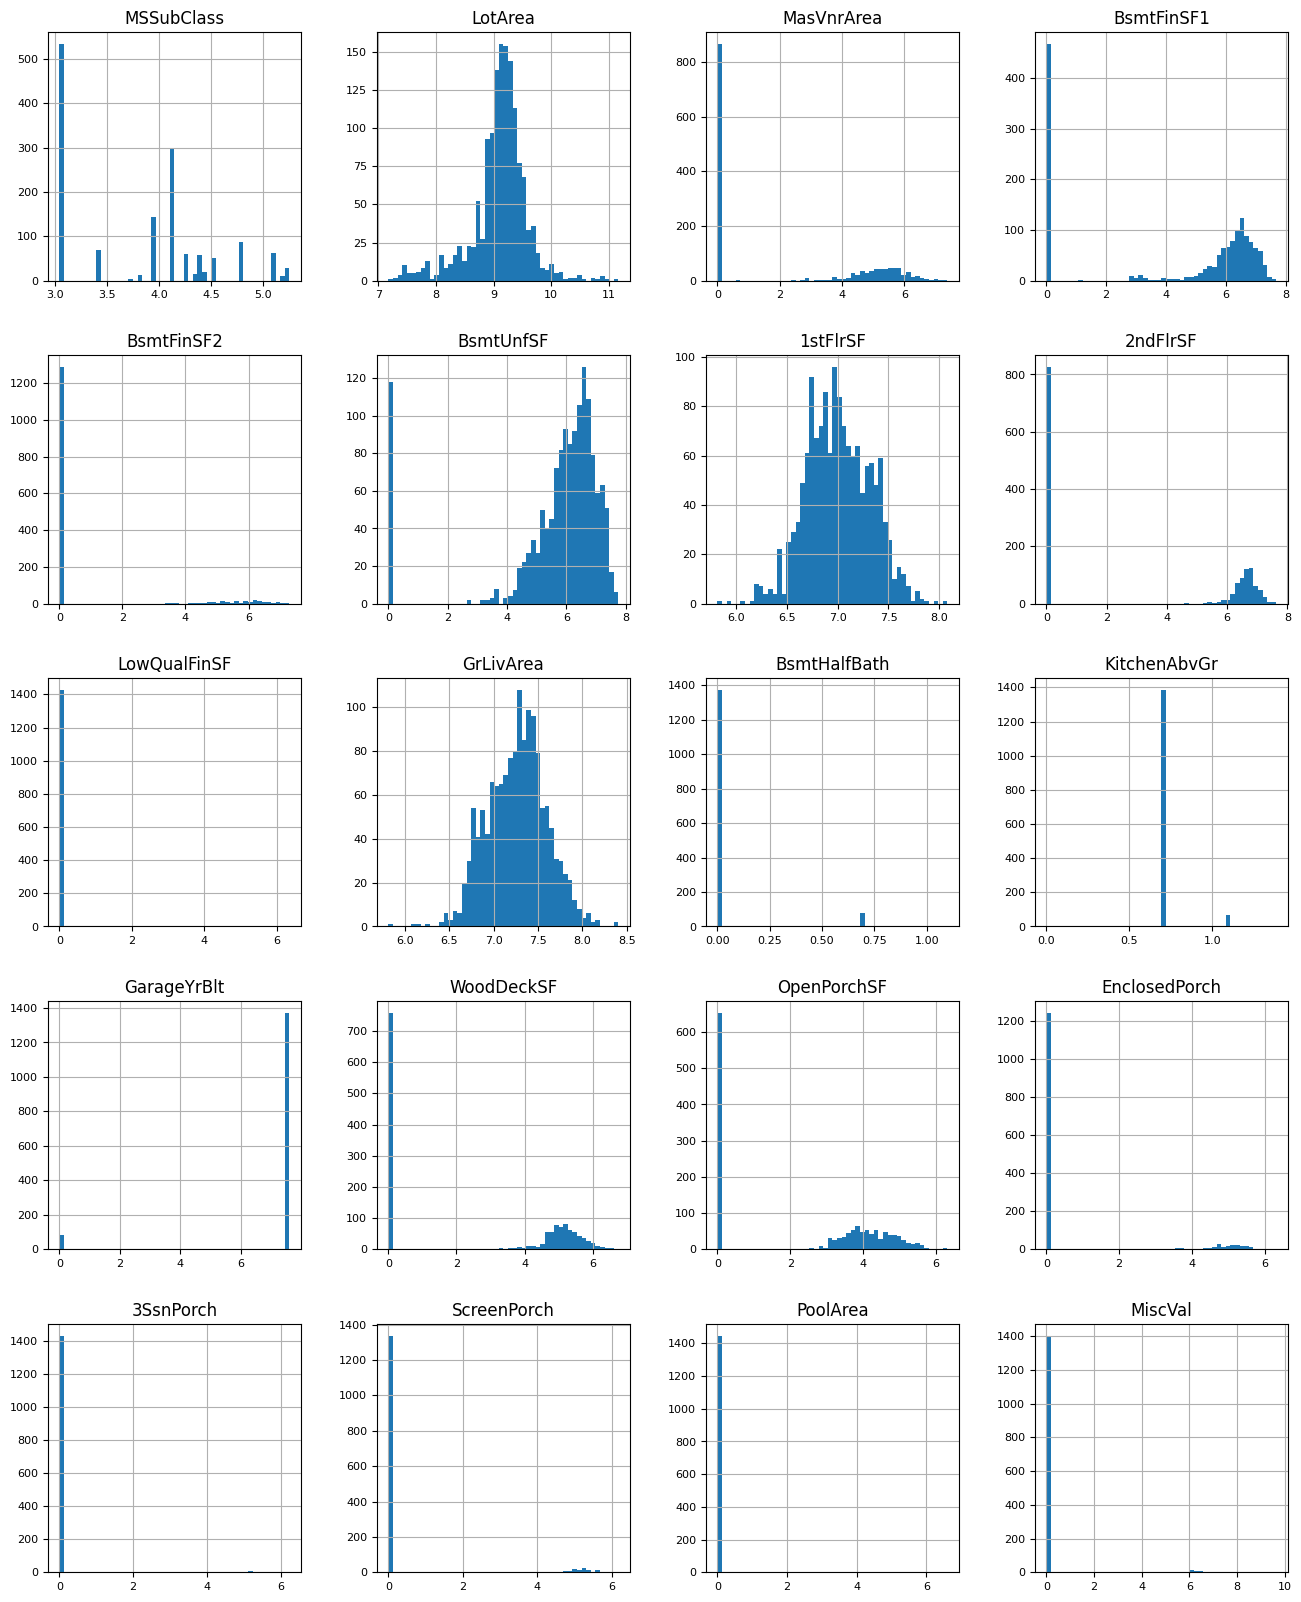

In [100]:
skew_feature_df = train_df[skewed_features]
skew_feature_df.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8)

### Preparing the dataset

In [101]:
y = train_df['SalePrice']
X = train_df.drop('SalePrice', axis=1)

X_test = test_df


In [102]:
X_test

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,3.044522,2,80.0,9.360741,1,1,3,3,0,...,4.795791,0.0,2,2,1,0.000000,6,2010,8,4
1,1462,3.044522,3,81.0,9.565775,1,1,0,3,0,...,0.000000,0.0,2,4,0,9.433564,6,2010,8,4
2,1463,4.110874,3,74.0,9.534668,1,1,0,3,0,...,0.000000,0.0,2,2,1,0.000000,3,2010,8,4
3,1464,4.110874,3,78.0,9.208238,1,1,0,3,0,...,0.000000,0.0,2,4,1,0.000000,6,2010,8,4
4,1465,4.795791,3,43.0,8.518392,1,1,0,1,0,...,4.976734,0.0,2,4,1,0.000000,1,2010,8,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,5.081404,4,21.0,7.568896,1,1,3,3,0,...,0.000000,0.0,2,4,1,0.000000,6,2006,8,4
1455,2916,5.081404,4,21.0,7.546974,1,1,3,3,0,...,0.000000,0.0,2,4,1,0.000000,4,2006,8,0
1456,2917,3.044522,3,160.0,9.903538,1,1,3,3,0,...,0.000000,0.0,2,4,1,0.000000,9,2006,8,0
1457,2918,4.454347,3,62.0,9.253591,1,1,3,3,0,...,0.000000,0.0,2,2,3,6.552508,7,2006,8,4


### Modeling

In [104]:
# Dictionary to store RMSE scores
model_scores = {}

**1-  Linear Regression**

In [105]:
linear_reg = LinearRegression()
linear_reg_scores = cross_val_score(linear_reg, X, y, cv=5, scoring='neg_mean_squared_error')
linear_reg_rmse = np.sqrt(-linear_reg_scores.mean())
model_scores['Linear Regression'] = linear_reg_rmse
print(f"Linear Regression RMSE: {linear_reg_rmse}")

Linear Regression RMSE: 0.12057773151930815


**2- Lasso Regression**

In [107]:
lasso = Lasso()
lasso_params = {'alpha': np.logspace(-4, 0, 20)}

lasso_grid = GridSearchCV(lasso, param_grid=lasso_params, cv=5, scoring='neg_mean_squared_error')
lasso_grid.fit(X, y)

lasso_best = lasso_grid.best_estimator_
lasso_rmse = np.sqrt(-lasso_grid.best_score_)
model_scores['Lasso Regression'] = lasso_rmse



In [108]:
print(f"Lasso Regression RMSE: {lasso_rmse}")
print(f"Best alpha for Lasso: {lasso_grid.best_params_['alpha']}")


Lasso Regression RMSE: 0.1202770331450569
Best alpha for Lasso: 0.00042813323987193956


**3- Ridge Regression**

In [109]:
ridge = Ridge()
ridge_params = {'alpha': [0.05, 0.1, 0.3, 1, 3, 5, 10, 15, 30, 50, 75]}  

ridge_grid = GridSearchCV(ridge, ridge_params, cv=5, scoring='neg_mean_squared_error')
ridge_grid.fit(X, y)
ridge_best = ridge_grid.best_estimator_

ridge_rmse = np.sqrt(-ridge_grid.best_score_)
model_scores['Ridge'] = ridge_rmse


In [110]:
print(f"Ridge Regression RMSE: {ridge_rmse}")
print(f"Best alpha for Ridge: {ridge_grid.best_params_['alpha']}")


Ridge Regression RMSE: 0.12057028090466954
Best alpha for Ridge: 0.3


**4- XGBoost Regression**

In [111]:
xgb_reg = XGBRegressor(objective='reg:squarederror', random_state=42)
xgb_params = {
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 5, 7],
    'n_estimators': [100, 500, 1000]
}

xgb_grid = GridSearchCV(xgb_reg, xgb_params, cv=5, scoring='neg_mean_squared_error')
xgb_grid.fit(X, y)

xgb_rmse = np.sqrt(-xgb_grid.best_score_)
model_scores['XGBoost Regression'] = xgb_rmse


In [112]:
print(f"XGBoost RMSE: {xgb_rmse}")


XGBoost RMSE: 0.12018636771962288


**Plotting the scores for comparison**

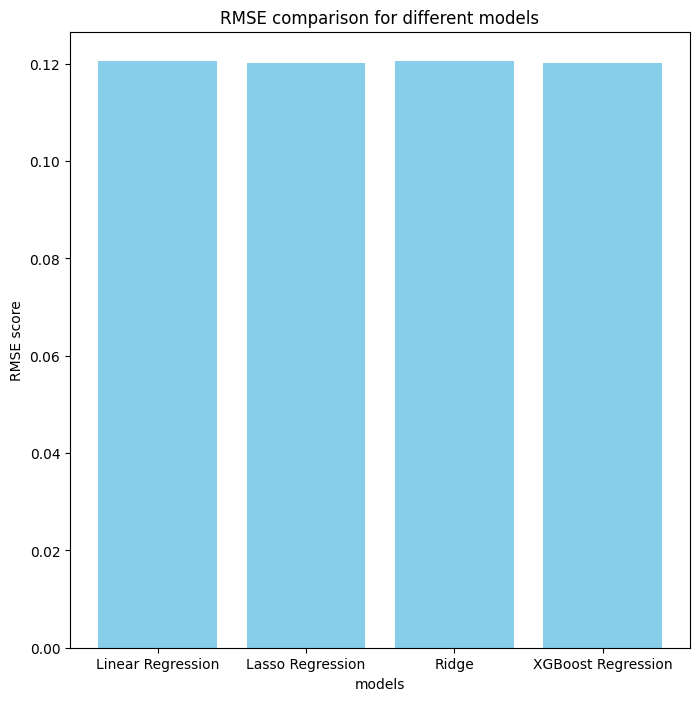

In [114]:
plt.figure(figsize=(8,8))
plt.bar(model_scores.keys(), model_scores.values(), color='skyblue')
plt.xlabel('models')
plt.ylabel('RMSE score')
plt.title('RMSE comparison for different models')
plt.show()

### Submission

In [120]:
submission_df = pd.DataFrame({'Id': test_df.Id})
submission_df

,Id
0,1461
1,1462
2,1463
3,1464
4,1465
...,...
1454,2915
1455,2916
1456,2917
1457,2918


In [121]:
test_df = test_df.drop('Id', axis=1)
preds = lasso_best.predict(test_df)
submission_df['SalePrice'] = preds

In [122]:
submission_df.to_csv('submission.csv')

In [123]:
submission_df.shape

(1447, 2)